
# 作業: 
    
    (1)以, Adam, 為例, 調整 batch_size, epoch , 觀察accurancy, loss 的變化
    
    (2)以同一模型, 分別驗證 SGD, Adam, Rmsprop 的 accurancy

In [1]:
import numpy 
import keras
from keras.datasets import mnist   # Keras 手寫辨識資料集 
from keras.preprocessing.image import ImageDataGenerator

from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import optimizers
from keras.callbacks import EarlyStopping, ModelCheckpoint

Using TensorFlow backend.


### 資料分割及標準化 

In [2]:
# 使用 Keras 自帶的 mnist 工具讀取數據（第一次需要聯網）
( X_train, y_train ), ( X_test, y_test ) = mnist.load_data( ) 
print( 'Shape of Train Data = ' + str( X_train.shape ) )

# 由於 mist 的輸入數據維度是 ( num, 28, 28 )，這裡需要把後面的維度直接拼起來變成784維   
X_train = X_train.reshape( X_train.shape[0], X_train.shape[1] * X_train.shape[2] )/255
X_test = X_test.reshape( X_test.shape[0], X_test.shape[1] * X_test.shape[2] )/255  
Y_train = ( numpy.arange( 10 ) == y_train[ :, None ] ).astype( int )
Y_test = ( numpy.arange( 10 ) == y_test[ :, None ] ).astype( int )

11493376/11490434 [==============================] - 1s 0us/step
Shape of Train Data = (60000, 28, 28)


### 建構神經網絡層

In [3]:
# 第一步：選擇模型, 順序模型是多個網絡層的線性堆疊
model = Sequential( )

# 第二步：構建網絡層
model.add( Dense( 512, input_shape = ( 784, ) ) )   # 輸入層，28 x 28 = 784   
model.add( Activation( 'relu' ) )                   # 激活函數是 relu   

model.add( Dense( 512 ) )        # 隱藏層節點500個   
model.add( Activation( 'relu') ) # 激活函數是 relu

model.add( Dense( 256 ) )        # 隱藏層節點500個  
model.add( Activation( 'relu') ) # 激活函數是 relu

model.add( Dense( 256 ) )        # 隱藏層節點500個   
model.add( Activation( 'relu') ) # 激活函數是 relu

model.add( Dense( 10 ) )             # 輸出結果是10個類別，所以維度是10   
model.add( Activation( 'softmax' ) ) # 最後一層用softmax作為激活函數


# 模型建立完成後，統計參數總量
print( "Total Parameters：%d" % model.count_params( ) )

# 輸出模型摘要資訊
model.summary()

W0713 02:26:05.229173 139622188849024 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0713 02:26:05.268945 139622188849024 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0713 02:26:05.275560 139622188849024 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



Total Parameters：864266
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
activation_2 (Activation)    (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               131328    
_________________________________________________________________
activation_3 (Activation)    (None, 256)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)            

#### 選擇演算法及損失函數

In [4]:
# Adam
Adam = optimizers.Adam( lr = 0.001, 
                        epsilon = None, 
                        decay = 0
                        )

model.compile( optimizer = Adam, 
               loss = 'categorical_crossentropy', 
               metrics = ['accuracy'] 
               )

W0713 02:26:05.386663 139622188849024 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0713 02:26:05.401535 139622188849024 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



#### 宣告變數 ---> 訓練模型 ---> 評量模型

##### batch_size = 1024 and epochs = 20

In [0]:
'''
   宣告並設定
   batch_size：對總的樣本數進行分組，每組包含的樣本數量
   epochs ：訓練次數   
''' 

batch_size_1 = 1024  # 盡量設定 2 的冪次方，以有利 GPU 加速
epochs_1 = 20

In [6]:
# 訓練及修正 model 參數
# Blas GEMM launch failed , 避免動態分配 GPU / CPU, 出現問題
import tensorflow as tf
gpu_options = tf.GPUOptions( per_process_gpu_memory_fraction = 0.333 )
sess = tf.Session( config = tf.ConfigProto( gpu_options = gpu_options ) )


history_1 = model.fit( X_train, 
                       Y_train,
                       validation_split = 0.3, 
                       batch_size = batch_size_1, 
                       epochs = epochs_1, 
                       shuffle = True,   # 是否把數據隨機打亂後再進行訓練
                       verbose = 2
                       )

W0713 02:26:05.579971 139622188849024 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0713 02:26:05.648130 139622188849024 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 42000 samples, validate on 18000 samples
Epoch 1/20
 - 5s - loss: 0.6174 - acc: 0.8299 - val_loss: 0.2383 - val_acc: 0.9300
Epoch 2/20
 - 4s - loss: 0.1855 - acc: 0.9450 - val_loss: 0.1549 - val_acc: 0.9547
Epoch 3/20
 - 4s - loss: 0.1209 - acc: 0.9641 - val_loss: 0.1445 - val_acc: 0.9567
Epoch 4/20
 - 4s - loss: 0.0924 - acc: 0.9724 - val_loss: 0.1178 - val_acc: 0.9646
Epoch 5/20
 - 4s - loss: 0.0599 - acc: 0.9822 - val_loss: 0.1036 - val_acc: 0.9697
Epoch 6/20
 - 4s - loss: 0.0427 - acc: 0.9876 - val_loss: 0.1075 - val_acc: 0.9682
Epoch 7/20
 - 4s - loss: 0.0306 - acc: 0.9914 - val_loss: 0.0970 - val_acc: 0.9728
Epoch 8/20
 - 4s - loss: 0.0201 - acc: 0.9948 - val_loss: 0.3058 - val_acc: 0.9216
Epoch 9/20
 - 4s - loss: 0.0577 - acc: 0.9816 - val_loss: 0.0941 - val_acc: 0.9732
Epoch 10/20
 - 4s - loss: 0.0233 - acc: 0.9932 - val_loss: 0.1017 - val_acc: 0.9738
Epoch 11/20
 - 4s - loss: 0.0115 - acc: 0.9969 - val_loss: 0.1040 - val_acc: 0.9742
Epoch 12/20
 - 4s - loss: 0.0062 - 

In [7]:
print ( " test set " )
scores_1 = model.evaluate( X_test, Y_test, batch_size = 200, verbose = 0 )
print ( "" )
print ( " The test loss is ", scores_1 )

result_1 = model.predict( X_test, batch_size = 200, verbose = 0 )
result_max_1 = numpy.argmax( result_1, axis = 1 )
test_max_1 = numpy.argmax( Y_test, axis = 1 )

result_bool_1 = numpy.equal( result_max_1, test_max_1 )
true_num_1 = numpy.sum( result_bool_1 )
print ( "" )
print ( 'Accuracy of 1024 Batch Size and 20 Epochs = ' + str( true_num_1 / len( result_bool_1 ) ) ) 

 test set 

 The test loss is  [0.09196837717116069, 0.9816000068187714]

Accuracy of 1024 Batch Size and 20 Epochs = 0.9816


##### batch_size = 128 and epochs = 10

In [0]:
'''
   宣告並設定
   batch_size：對總的樣本數進行分組，每組包含的樣本數量
   epochs ：訓練次數   
''' 

batch_size_2 = 128  # 盡量設定 2 的冪次方，以有利 GPU 加速
epochs_2 = 10

In [9]:
# 訓練及修正 model 參數
# Blas GEMM launch failed , 避免動態分配 GPU / CPU, 出現問題
import tensorflow as tf
gpu_options = tf.GPUOptions( per_process_gpu_memory_fraction = 0.333 )
sess = tf.Session( config = tf.ConfigProto( gpu_options = gpu_options ) )


history_2 = model.fit( X_train, 
                       Y_train,
                       validation_split = 0.3, 
                       batch_size = batch_size_2, 
                       epochs = epochs_2, 
                       shuffle = True,   # 是否把數據隨機打亂後再進行訓練
                       verbose = 2
                       )

Train on 42000 samples, validate on 18000 samples
Epoch 1/10
 - 8s - loss: 0.1000 - acc: 0.9699 - val_loss: 0.1064 - val_acc: 0.9693
Epoch 2/10
 - 8s - loss: 0.0509 - acc: 0.9839 - val_loss: 0.1077 - val_acc: 0.9703
Epoch 3/10
 - 8s - loss: 0.0348 - acc: 0.9886 - val_loss: 0.1106 - val_acc: 0.9718
Epoch 4/10
 - 8s - loss: 0.0296 - acc: 0.9904 - val_loss: 0.1291 - val_acc: 0.9704
Epoch 5/10
 - 7s - loss: 0.0216 - acc: 0.9932 - val_loss: 0.1140 - val_acc: 0.9753
Epoch 6/10
 - 7s - loss: 0.0231 - acc: 0.9931 - val_loss: 0.1176 - val_acc: 0.9730
Epoch 7/10
 - 8s - loss: 0.0185 - acc: 0.9941 - val_loss: 0.1298 - val_acc: 0.9713
Epoch 8/10
 - 8s - loss: 0.0181 - acc: 0.9947 - val_loss: 0.1049 - val_acc: 0.9755
Epoch 9/10
 - 8s - loss: 0.0113 - acc: 0.9968 - val_loss: 0.1211 - val_acc: 0.9745
Epoch 10/10
 - 7s - loss: 0.0138 - acc: 0.9957 - val_loss: 0.1257 - val_acc: 0.9737


In [10]:
print ( " test set " )
scores_2 = model.evaluate( X_test, Y_test, batch_size = 200, verbose = 0 )
print ( "" )
print ( " The test loss is ", scores_2 )

result_2 = model.predict( X_test, batch_size = 200, verbose = 0 )
result_max_2 = numpy.argmax( result_2, axis = 1 )
test_max_2 = numpy.argmax( Y_test, axis = 1 )

result_bool_2 = numpy.equal( result_max_2, test_max_2 )
true_num_2 = numpy.sum( result_bool_2 )
print ( "" )
print ( 'Accuracy of 128 Batch Size and 10 Epochs = ' + str( true_num_2 / len( result_bool_2 ) ) ) 

 test set 

 The test loss is  [0.10516954673414147, 0.9775000047683716]

Accuracy of 128 Batch Size and 10 Epochs = 0.9775


####  Loss Function and Accuracy 

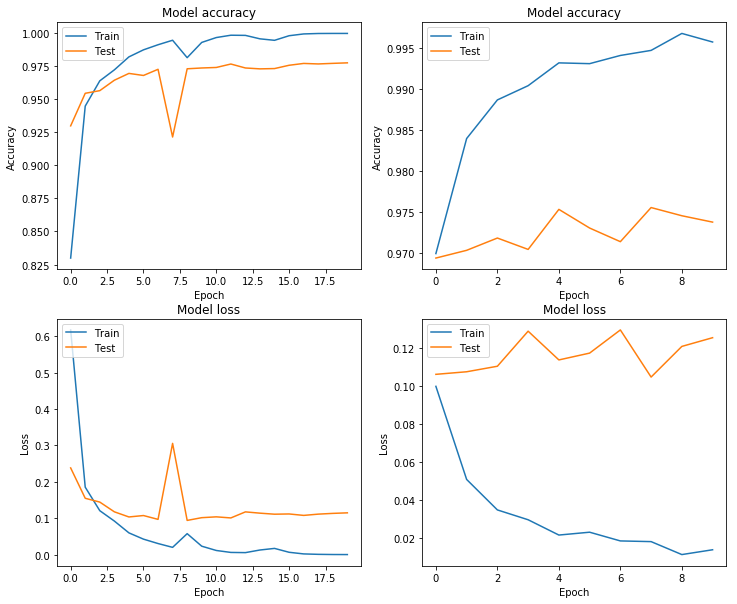

In [11]:
import matplotlib.pyplot as plt

%matplotlib inline

# history = model.fit(x, y, validation_split=0.25, epochs=50, batch_size=16, verbose=1)

# Plot training & validation accuracy values


fig, axs = plt.subplots( 2, 2, figsize = ( 12, 10 ) )


# Plot training & validation accuracy values
plt.subplot( 2, 2, 1 )
plt.plot( history_1.history['acc'])
plt.plot( history_1.history['val_acc'])
plt.title( 'Model accuracy' )
plt.ylabel( 'Accuracy' )
plt.xlabel( 'Epoch' )
plt.legend( [ 'Train', 'Test' ], loc = 'upper left' )


plt.subplot( 2, 2, 2 )
plt.plot( history_2.history['acc'])
plt.plot( history_2.history['val_acc'])
plt.title( 'Model accuracy' )
plt.ylabel( 'Accuracy' )
plt.xlabel( 'Epoch' )
plt.legend( [ 'Train', 'Test' ], loc = 'upper left' )


# Plot training & validation loss values

plt.subplot( 2, 2, 3 )
plt.plot( history_1.history[ 'loss' ] )
plt.plot( history_1.history[ 'val_loss' ] )
plt.title( 'Model loss' )
plt.ylabel( 'Loss' )
plt.xlabel( 'Epoch' )
plt.legend( [ 'Train', 'Test' ], loc='upper left')


plt.subplot( 2, 2, 4 )
plt.plot( history_2.history[ 'loss' ] )
plt.plot( history_2.history[ 'val_loss' ] )
plt.title( 'Model loss' )
plt.ylabel( 'Loss' )
plt.xlabel( 'Epoch' )
plt.legend( [ 'Train', 'Test' ], loc='upper left')


plt.show( )

### SGD

In [12]:
'''
SGD(隨機梯度下降) - Arguments
lr: float >= 0. Learning rate.
momentum: float >= 0. Parameter that accelerates SGD in the relevant direction and dampens oscillations.
decay: float >= 0. Learning rate decay over each update.
nesterov: boolean. Whether to apply Nesterov momentum.
'''

SGD = optimizers.SGD( lr = 0.001 )

model.compile( optimizer = SGD, 
               loss = 'categorical_crossentropy', 
               metrics = ['accuracy'] 
               )

history_3 = model.fit( X_train, 
                       Y_train,
                       validation_split = 0.3, 
                       batch_size = 128, 
                       epochs = 10, 
                       shuffle = True,   # 是否把數據隨機打亂後再進行訓練
                       verbose = 2
                       )

print ( " test set " )
scores_3 = model.evaluate( X_test, Y_test, batch_size = 200, verbose = 0 )
print ( "" )
print ( " The test loss is ", scores_3 )

result_3 = model.predict( X_test, batch_size = 200, verbose = 0 )
result_max_3 = numpy.argmax( result_3, axis = 1 )
test_max_3 = numpy.argmax( Y_test, axis = 1 )

result_bool_3 = numpy.equal( result_max_3, test_max_3 )
true_num_3 = numpy.sum( result_bool_3 )
print ( "" )
print ( 'Accuracy of SGD with 128 Batch Size and 10 Epochs = ' + str( true_num_3 / len( result_bool_3 ) ) ) 

Train on 42000 samples, validate on 18000 samples
Epoch 1/10
 - 6s - loss: 0.0105 - acc: 0.9969 - val_loss: 0.1244 - val_acc: 0.9743
Epoch 2/10
 - 6s - loss: 0.0097 - acc: 0.9971 - val_loss: 0.1235 - val_acc: 0.9744
Epoch 3/10
 - 6s - loss: 0.0090 - acc: 0.9972 - val_loss: 0.1227 - val_acc: 0.9745
Epoch 4/10
 - 6s - loss: 0.0085 - acc: 0.9974 - val_loss: 0.1220 - val_acc: 0.9745
Epoch 5/10
 - 6s - loss: 0.0080 - acc: 0.9975 - val_loss: 0.1214 - val_acc: 0.9747
Epoch 6/10
 - 6s - loss: 0.0076 - acc: 0.9976 - val_loss: 0.1209 - val_acc: 0.9748
Epoch 7/10
 - 6s - loss: 0.0072 - acc: 0.9977 - val_loss: 0.1204 - val_acc: 0.9747
Epoch 8/10
 - 6s - loss: 0.0069 - acc: 0.9978 - val_loss: 0.1200 - val_acc: 0.9748
Epoch 9/10
 - 6s - loss: 0.0066 - acc: 0.9979 - val_loss: 0.1196 - val_acc: 0.9749
Epoch 10/10
 - 6s - loss: 0.0063 - acc: 0.9979 - val_loss: 0.1192 - val_acc: 0.9750
 test set 

 The test loss is  [0.09660670360857694, 0.979900004863739]

Accuracy of SGD with 128 Batch Size and 10 Epo

### RMSprop

In [13]:
'''
RMSprop- Arguments
lr: float >= 0. Learning rate.
rho: float >= 0.
epsilon: float >= 0. Fuzz factor. If None, defaults to K.epsilon().
decay: float >= 0. Learning rate decay over each update.
'''

RMSprop = optimizers.RMSprop( lr = 0.001 )

model.compile( optimizer = RMSprop, 
               loss = 'categorical_crossentropy', 
               metrics = ['accuracy'] 
               )

history_4 = model.fit( X_train, 
                       Y_train,
                       validation_split = 0.3, 
                       batch_size = 128, 
                       epochs = 10, 
                       shuffle = True,   # 是否把數據隨機打亂後再進行訓練
                       verbose = 2
                       )

print ( " test set " )
scores_4 = model.evaluate( X_test, Y_test, batch_size = 200, verbose = 0 )
print ( "" )
print ( " The test loss is ", scores_4 )

result_4 = model.predict( X_test, batch_size = 200, verbose = 0 )
result_max_4 = numpy.argmax( result_4, axis = 1 )
test_max_4 = numpy.argmax( Y_test, axis = 1 )

result_bool_4 = numpy.equal( result_max_4, test_max_4 )
true_num_4 = numpy.sum( result_bool_4 )
print ( "" )
print ( 'Accuracy of RMSprop with 128 Batch Size and 10 Epochs = ' + str( true_num_4 / len( result_bool_4 ) ) ) 


Train on 42000 samples, validate on 18000 samples
Epoch 1/10
 - 8s - loss: 0.0099 - acc: 0.9972 - val_loss: 0.1877 - val_acc: 0.9753
Epoch 2/10
 - 7s - loss: 0.0089 - acc: 0.9981 - val_loss: 0.1807 - val_acc: 0.9767
Epoch 3/10
 - 7s - loss: 0.0072 - acc: 0.9982 - val_loss: 0.1998 - val_acc: 0.9771
Epoch 4/10
 - 7s - loss: 0.0069 - acc: 0.9983 - val_loss: 0.1901 - val_acc: 0.9767
Epoch 5/10
 - 7s - loss: 0.0057 - acc: 0.9988 - val_loss: 0.2041 - val_acc: 0.9789
Epoch 6/10
 - 7s - loss: 0.0072 - acc: 0.9986 - val_loss: 0.2162 - val_acc: 0.9779
Epoch 7/10
 - 7s - loss: 0.0061 - acc: 0.9988 - val_loss: 0.2068 - val_acc: 0.9776
Epoch 8/10
 - 7s - loss: 0.0075 - acc: 0.9986 - val_loss: 0.2373 - val_acc: 0.9749
Epoch 9/10
 - 7s - loss: 0.0063 - acc: 0.9987 - val_loss: 0.2141 - val_acc: 0.9776
Epoch 10/10
 - 7s - loss: 0.0072 - acc: 0.9988 - val_loss: 0.2329 - val_acc: 0.9762
 test set 

 The test loss is  [0.18322305245929157, 0.9817000079154968]

Accuracy of RMSprop with 128 Batch Size and 1